In [ ]:
#!pip install chart-studio
#!pip install swifter --user

In [132]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/edsa-recommender-system-predict/movies.csv
/kaggle/input/edsa-recommender-system-predict/imdb_data.csv
/kaggle/input/edsa-recommender-system-predict/genome_scores.csv
/kaggle/input/edsa-recommender-system-predict/sample_submission.csv
/kaggle/input/edsa-recommender-system-predict/tags.csv
/kaggle/input/edsa-recommender-system-predict/test.csv
/kaggle/input/edsa-recommender-system-predict/links.csv
/kaggle/input/edsa-recommender-system-predict/genome_tags.csv
/kaggle/input/edsa-recommender-system-predict/train.csv


# Table of Contents

1. Dependencies and Datasets
    - 1.1. Importing Libraries
    - 1.2. Import Datasets
2. Confirmatory Data Analysis
    - 2.1. Data Info
    - 2.2. Missing Values
3. Exploratory Data Analysis
    -
    -
    -
    -
    -
       

# 1. Dependencies and Datasets

## 1.1 Import Libraries
First we import all the necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
py.offline.init_notebook_mode(connected=True)
from math import floor
from plotly import tools
from plotly.graph_objs import *
from IPython.display import display
init_notebook_mode(connected=True)
print('Packages Imported Successfully!')

Packages Imported Successfully!


## 1.2 Import the Data
Here we import the data we will be working with. The datasets we will be importing are as follows:
    
   - movies.csv as 'movies'
   - imdb_data.csv as 'imdb'
   - train.csv as 'ratings'

In [99]:
movies = pd.read_csv('/kaggle/input/edsa-recommender-system-predict/movies.csv')
imdb = pd.read_csv('/kaggle/input/edsa-recommender-system-predict/imdb_data.csv')
ratings = pd.read_csv('/kaggle/input/edsa-recommender-system-predict/train.csv')
                      
print('Data Successfully imported!')

Data Successfully imported!


In [163]:
display(ratings)
display(movies)
display(imdb)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837
...,...,...,...,...
10000033,136395,99114,5.0,1521235092
10000034,140078,553,3.0,1002580977
10000035,154807,56782,4.0,1227674807
10000036,85805,327,4.0,1479921530


,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
62418,209157,We,Drama,2018
62419,209159,Window of the Soul,Documentary,2001
62420,209163,Bad Poems,Comedy|Drama,2018
62421,209169,A Girl Thing,(no genres listed),2001


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",None
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",None
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",None
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",None
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",None
...,...,...,...,...,...,...
27273,131254,Franz Dinda|Florian Lukas|Axel Stein|Kailas Ma...,Carsten Funke,85.0,NaN,None
27274,131256,Rick Kavanian|Axel Stein|Eva Habermann|Christo...,Matthias Dinter,83.0,"DEM5,800,000",None
27275,131258,Nam-gil Kim|Ye-jin Son|Hae-Jin Yoo|Kyeong-yeon...,Seong-il Cheon,130.0,NaN,None
27276,131260,Martti Suosalo|Ilkka Koivula|Vexi Salmi|Riitta...,Timo Koivusalo,102.0,NaN,None


The first thing we will do is merge our datasets into one dataframe. We will drop the 'timestamp' column as it plays no role in the upcoming analysis.

In [101]:
#genome_df = g_scores.merge(g_tags, on='tagId')
data = ratings.drop('timestamp', axis=1).merge(movies.merge(imdb, on ='movieId'),on='movieId')
print('Merges Successfull!')

Merges Successfull!


In [102]:
data.head()

,userId,movieId,rating,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


# Confirmatory Data Analysis
Now we will take a look at our data to ensure that everything is as should be.
  - Data Info
    - The first few rows of the data
    - The shape of the dataframe, this includes the number of columns and rows
    - The names of the columns in the dataframe and their respective data types
    - The statistical summary of the numerical columns
  - Null values : number of cells with NaN values
   

## Data Info

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.describe()

## Missing Values
Now, let's see if we have any missing values in our dataset. 

In [ ]:
import missingno
missingno.matrix(data, figsize=(22,5))
#plt.xlabel('Features'); 
#plt.ylabel('Null Occurences'); 
#plt.title('Columns With Missung Values');
#fig.suptitle('Columns With Missung Values', fontsize=20)
plt.xlabel('Features', fontsize=18)
plt.ylabel('Null Occurences', fontsize=16)

As we can see from the visual above, the ***budget***, ***runtime***, ***title_cast*** and **director** columns have missing values. But this does not give any information on how many rows in these columns have missing values. We'll use the function defined below to show the number of missing values in each of the identified columns and what percentage of the data is missing.

In [ ]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [ ]:
missing_values_table(data)

The number of missing values in these columns is not so high that it could affect our analysis of the data. The only column we will be using that will be affected is the ***runtime*** column. What we will do is  impute all the missing values in this column with the mean of the data

In [ ]:
data['runtime'].fillna(data['runtime'].mean(), inplace=True)

As we can see below, the ***runtime*** column does not appear to be on the list of columns with missing values.

In [ ]:
missing_values_table(data)

# Exploratory Data Analysis

In [ ]:
data.columns

## What is the most rated movie?

In [ ]:
# check if there are multiple movies with the same title, and if so, determine if they are actually duplicates
result = data[data['title'].isin(data[data.duplicated(['title'])]['title'])]
result.sort_values('title')

In [ ]:
# Most rated titles
most_rated = pd.DataFrame(data.groupby('title')['rating'].count().sort_values(ascending=False)).reset_index()

In [ ]:
#most_rated.rename('rating', 'num_of_ratings')
most_rated.rename(columns={'rating': 'num_of_ratings'}, inplace=True)
most_rated

In [ ]:

f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(data=most_rated[0:20],y='title',x='num_of_ratings')
# Add a legend and informative axis label
ax.set(ylabel="",
       xlabel="Rating Count")
ax.title.set_text('The Highest Rated Movies')
sns.despine(left=True, bottom=True)

## Which movies have the shortest and longest runtime?


Let's first take a look at what the average runtime of movies inour dataset is.

In [23]:
# calculate the average movie duration
round(data['runtime'].mean(),2)

116.1

1. The average runtime is 116.1. This equates to ~1.9 hours, which is a normal runtime for movies. Next, let's look at the movies with the shortest and longest runtimes. 

In [30]:
# calculate the average star rating for movies 2 hours or longer,
# and compare that with the average star rating for movies shorter than 2 hours
print('Avg. star rating for movies 2 hours or longer: ', round(data[data['runtime'] >= 120]['rating'].mean(),2), 
 '\nAvg. star rating for movies shorter than 2 hours: ', round(data[data['runtime'] < 120]['rating'].mean(),2))

Avg. star rating for movies 2 hours or longer:  3.66 
Avg. star rating for movies shorter than 2 hours:  3.38


In [72]:
df = data[data['runtime'] <= 248] 

In [73]:
df.head()

,userId,movieId,rating,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [74]:
#use the function 'idmin' to find the index of lowest profit movie.
#use the function 'idmax' to find the index of Highest profit movie.
#print the row related to this index.
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df['title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",df['title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('runtime')

Movie Which Has Highest runtime :  My Voyage to Italy (Il mio viaggio in Italia) (1999)
Movie Which Has Lowest runtime  :  Stille Nacht I: Dramolet (1988)


,8148250,9438402
userId,160506,124638
movieId,8755,126050
rating,3,2.5
title,My Voyage to Italy (Il mio viaggio in Italia) ...,Stille Nacht I: Dramolet (1988)
genres,Documentary,Animation
title_cast,Martin Scorsese,NaN
director,Suso Cecchi D'Amico,Stephen Quay
runtime,246,1
budget,NaN,NaN
plot_keywords,film history|filmmaking|italian cinema|italian...,magnet|doll|spoon|moth


In [111]:
info = pd.DataFrame(df['runtime'].sort_values(ascending = False))
info['original_title'] = df['title']
info.drop_duplicates(inplace = True)
info.reset_index(drop=True, inplace=True)

In [112]:
info

,runtime,original_title
0,246.0,My Voyage to Italy (Il mio viaggio in Italia) ...
1,244.0,At Berkeley (2013)
2,242.0,Hamlet (1996)
3,240.0,Joan of Arc (1999)
4,240.0,Madagascar (2011)
...,...,...
12976,1.0,Stille Nacht I: Dramolet (1988)
12977,1.0,Santa Claus (1898)
12978,1.0,The Kiss (1900)
12979,1.0,Dickson Greeting (1891)


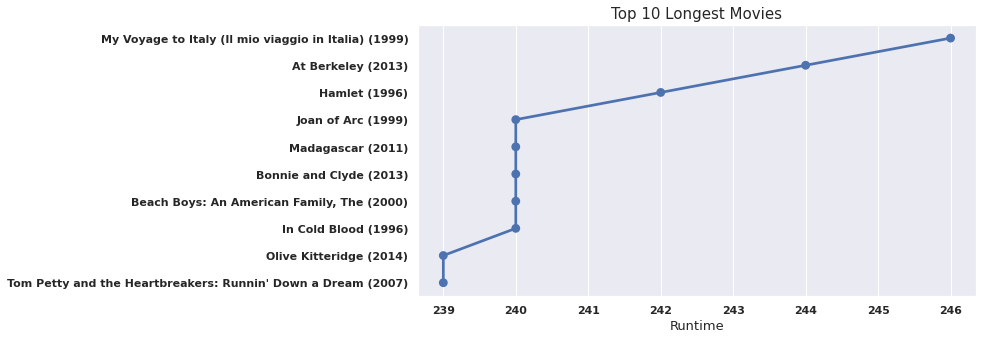

In [97]:
#make a plot which contain top 10 movies which earn highest profit.
#sort the 'Profit' column in decending order and store it in the new dataframe,
#info = pd.DataFrame(df['runtime'].sort_values(ascending = False))
#info['original_title'] = df['title']
df2 = list(map(str,(info['original_title'])))
x = list(df2[:10])
y = list(info['runtime'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Longest Movies",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("darkgrid")


## Rating distribution

In [11]:
# The minimum and maximum ratings given by the users

print('The minimum rating given is:',data['rating'].min())
print('The maximum rating given is:',data['rating'].max())

The minimum rating given is: 0.5
The maximum rating given is: 5.0


Average rating in dataset: 3.5333951730983424


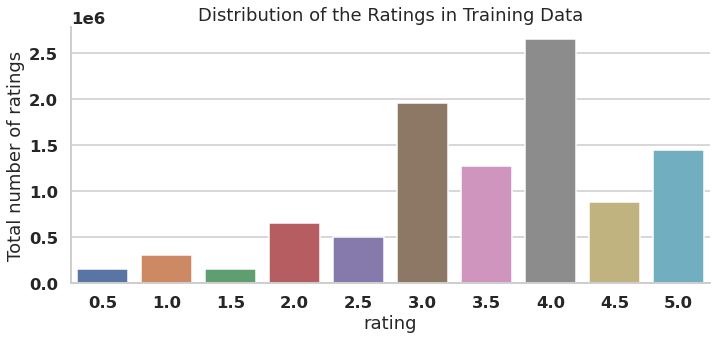

In [13]:
with sns.axes_style('whitegrid'):
    g = sns.catplot("rating", data=ratings, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")
    plt.title('Distribution of the Ratings in Training Data')
print (f'Average rating in dataset: {np.mean(ratings["rating"])}')

In [14]:
# Function creates ranges for ratings
# To be used for visualisations

def rating_range(text):
  
  if int (text) < 1:
    return '0-1'
  elif int (text) <2:
    return'1-2'
  elif int (text) <3:
    return '2-3'
  elif int (text) <4:
    return '3-4'
  else:
    return '4-5'

In [15]:
# Generate a movie_rating dataframe

movie_rating=data.groupby(['title'])['rating'].mean() # agg rating by mean
movie_rating=pd.DataFrame(movie_rating)
movie_rating

,rating
title,
"""Great Performances"" Cats (1998)",2.753731
$ (Dollars) (1971),2.875000
$5 a Day (2008),3.125000
$9.99 (2008),3.222222
$ellebrity (Sellebrity) (2012),2.250000
...,...
À nous la liberté (Freedom for Us) (1931),3.746914
À propos de Nice (1930),3.200000
Árido Movie (2005),3.000000


In [16]:
pd.DataFrame(movie_rating.sort_values(by='rating', ascending=False))

,rating
title,
Wrestling for Jesus: The Tale of T-Money (2011),5.0
The... Beautiful Country (1977),5.0
Only Daughter (2013),5.0
Vasermil (2007),5.0
"Day the Universe Changed, The (1985)",5.0
...,...
Time to Kill (Tempo di uccidere) (1989),0.5
"Dangerous Place, A (2012)",0.5
Dana Carvey: Squatting Monkeys Tell No Lies (2008),0.5


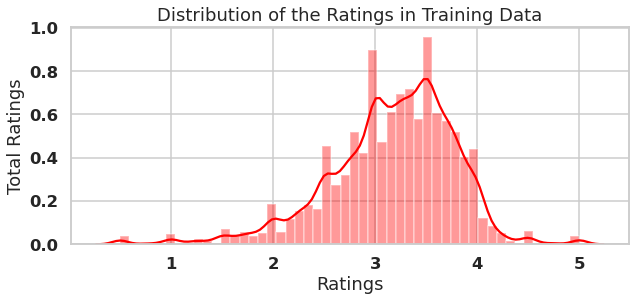

In [17]:
#Plot distribution of ratings on scale 0-5

plt.figure(figsize=(10,4))
sns.set(style="whitegrid", context="talk")
sns.distplot(movie_rating['rating'],bins=50,kde=True,color='red')
plt.title('Distribution of the Ratings in Training Data')
plt.xlabel('Ratings') 
plt.ylabel('Total Ratings')   
plt.show()

In [19]:
# Apply rating_range function to generate a range column

movie_rating['range']=movie_rating['rating'].apply(rating_range)
movie_rating

,rating,range
title,,
"""Great Performances"" Cats (1998)",2.753731,2-3
$ (Dollars) (1971),2.875000,2-3
$5 a Day (2008),3.125000,3-4
$9.99 (2008),3.222222,3-4
$ellebrity (Sellebrity) (2012),2.250000,2-3
...,...,...
À nous la liberté (Freedom for Us) (1931),3.746914,3-4
À propos de Nice (1930),3.200000,3-4
Árido Movie (2005),3.000000,3-4


In [21]:
# Generate column to sum number of ratings per title

movie_rating['num_of_ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())

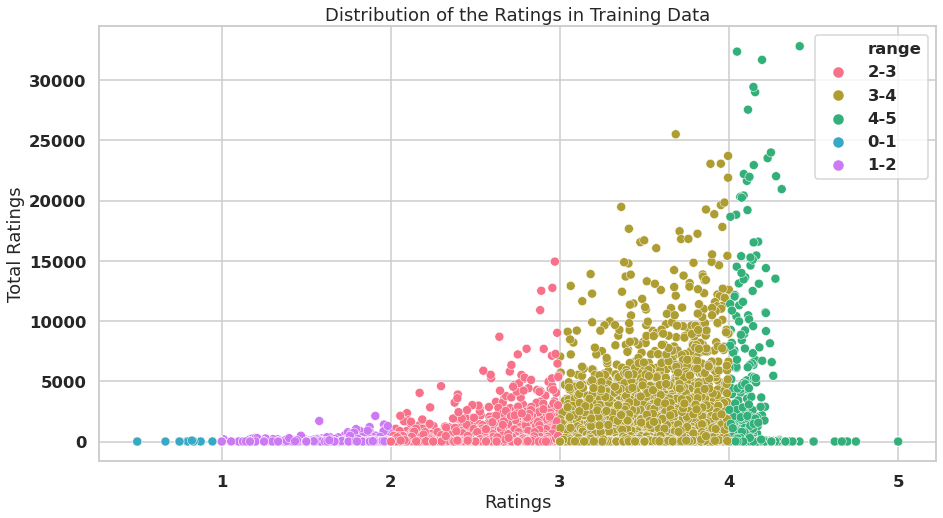

In [22]:
# Plot scatter plot illustrating the relationship between ratings and number of ratings

sns.set(style="whitegrid", context="talk")
f, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x=movie_rating['rating'], y=movie_rating['num_of_ratings'],
hue=movie_rating['range'],palette="husl",sizes=(1, 8), linewidth=0.5,data=movie_rating, ax=ax) # range used to categorise ratings
plt.title('Distribution of the Ratings in Training Data')
plt.xlabel('Ratings') 
plt.ylabel('Total Ratings') 
plt.show()

### Which year has the highest release of movies?

In [138]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don’t conflict with movies that have years in their titles
movies['year'] = movies['title'].str.extract("(\(\d\d\d\d\))",expand=False)
#Removing the parentheses
movies['year'] = movies['year'].str.extract("(\d\d\d\d)",expand=False)
#Removing the years from the ‘title’ column
movies['title'] = movies['title'].str.replace("(\(\d\d\d\d\))", "")
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies['title'] = movies['title'].apply(lambda x: x.strip())

In [139]:
pd.to_datetime(movies.year, format='%Y')

0       1995-01-01
1       1995-01-01
2       1995-01-01
3       1995-01-01
4       1995-01-01
           ...    
62418   2018-01-01
62419   2001-01-01
62420   2018-01-01
62421   2001-01-01
62422   1962-01-01
Name: year, Length: 62423, dtype: datetime64[ns]

In [141]:
year_df = pd.DataFrame(movies.groupby('year')['title'].count()).reset_index()

In [ ]:
year_df.head()

In [142]:
year_df.rename(columns={'title': 'num_of_titles'}, inplace=True)
year_df.sort_values(by='year', ascending=False)

,year,num_of_titles
134,2019,994
133,2018,2034
132,2017,2374
131,2016,2488
130,2015,2513
...,...,...
4,1887,1
3,1883,1
2,1880,1
1,1878,1


In [145]:
 def era(year):
    if int(year) < 1899:
        return '1800s'
    elif int(year) < 1999:
        return '1900s'
    else:
        return '2000s'
    

In [146]:
year_df['period'] = year_df['year'].apply(era)

In [143]:
trace1 = go.Scatter(x=year_df.year,
                    y=year_df.num_of_titles,
                    name = 'Number of Movies Released per Year, 1874-2019',
                    line = dict(color = 'blue'),
                    opacity = 0.4)

layout = dict(title='Number of Movies Released per Year, 1874-2019',)

fig = dict(data=[trace1], layout=layout)
iplot(fig)

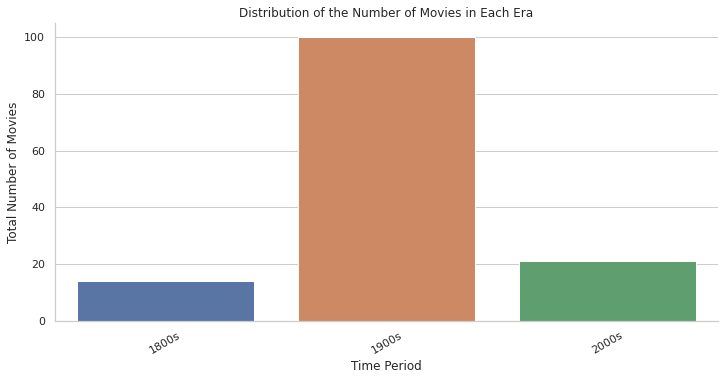

In [147]:

with sns.axes_style('whitegrid'):
    
    g = sns.catplot("period", data=year_df, aspect=2.0,kind='count')
    g.set_ylabels("Total Number of Movies")
    g.set_xlabels("Time Period")
    plt.title('Distribution of the Number of Movies in Each Time Period')
    plt.xticks(rotation=30)
    #f, ax = plt.subplots(figsize=(25, 8))

### Movie with Longest And Shortest Runtime?

In [ ]:

#find the movie with longest and shortest runtime.
#use 'find_minmax' function which i made earlier by passsing 'runtime' as argument.
#it can't be possible a movie with zero runtime,but dataset contain some data like this.
#so update zero with NAN in runtime column.
data['runtime'] = data['runtime'].replace(0,np.NAN)


### Which Genre Has The Highest Release Of Movies?

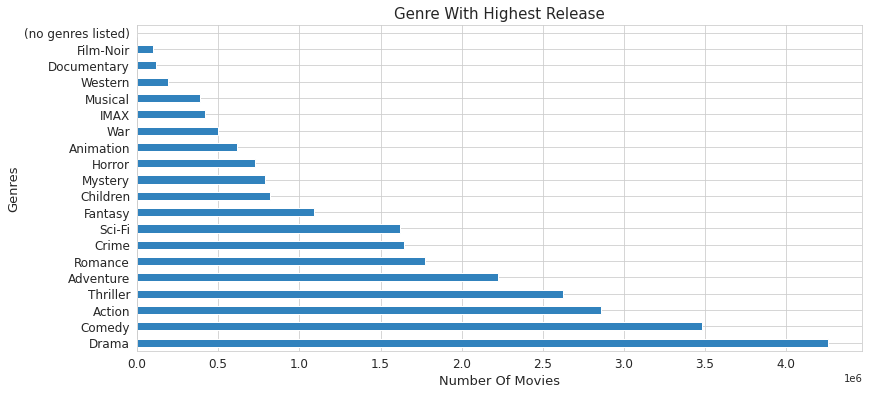

In [8]:
#make a function will will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genres.
    data_plot = data[x].str.cat(sep = '|')
    df = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = df.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

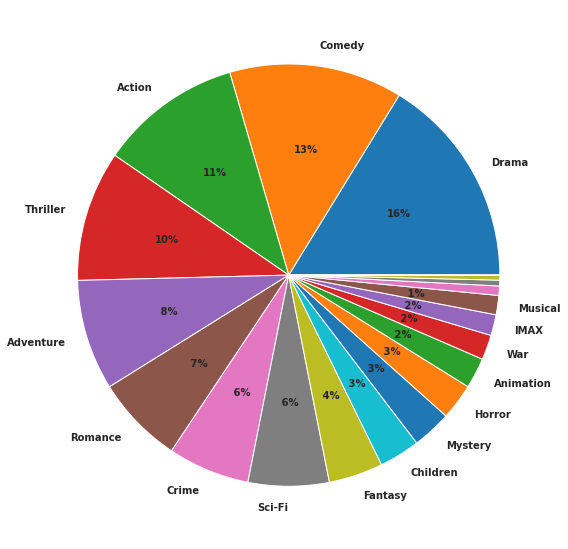

In [10]:
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(8, 8))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()


### Most Frequent Actor?

In [3]:
def count_genre(x):
    #concatenate all the rows of the genres.
    data_plot = imdb[x].str.cat(sep = '|')
    df = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = df.value_counts(ascending=False)
    return info

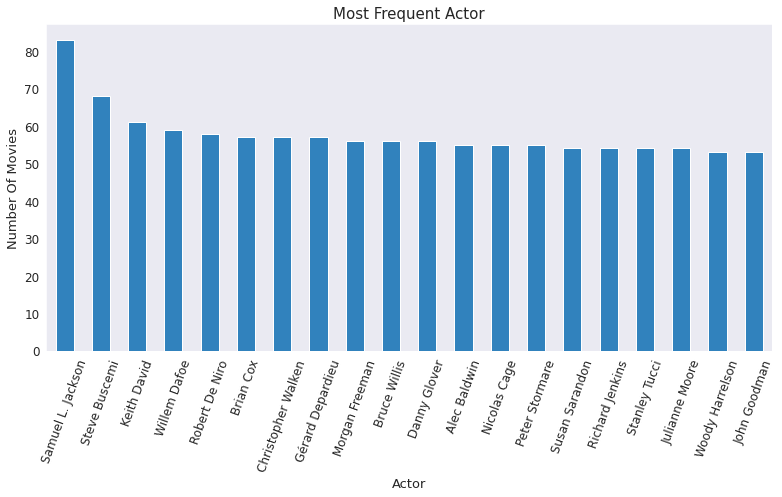

In [4]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies done by each actor.
count_actor_films = count_genre('title_cast')

#plot the barh plot.
count_actor_films.iloc[:20].plot.bar(figsize=(13,6),colormap= 'tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

### Top 20 Director Who Directs Maximum Movies?

In [171]:
def count_genre(x):
    #concatenate all the rows of the genres.
    data_plot = imdb[x].str.cat(sep = '|')
    df = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = df.value_counts(ascending=False)
    return info

In [174]:
count_director_movies

Quentin Tarantino          109919
Michael Crichton            65157
J.R.R. Tolkien              62963
Lilly Wachowski             60988
Stephen King                59903
                            ...  
Nenad Cicin-Sain                1
Simon Michaël                   1
Kunio Watanabe                  1
Paul Hasegawa-Overacker         1
Will Elliott                    1
Length: 9995, dtype: int64

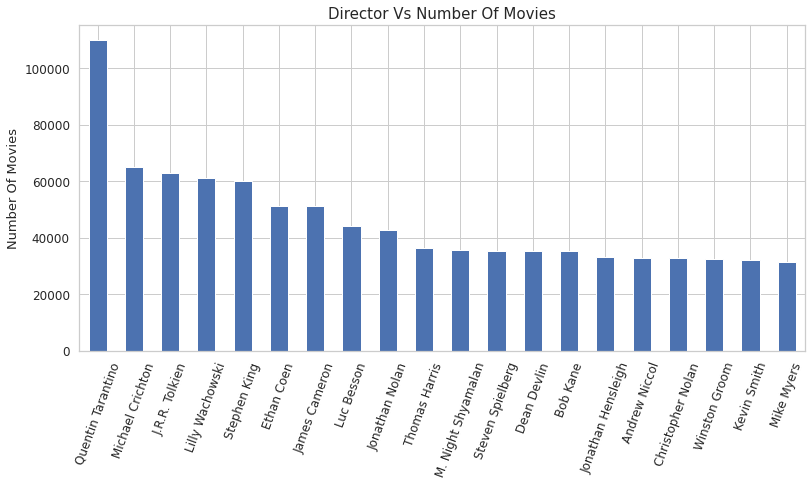

In [172]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies directed by each diretor.
count_director_movies = count_genre('director')

#plot a barh graph
count_director_movies.iloc[:20].plot(kind='bar',figsize=(13,6),fontsize=12)

#setup the title and the labels 
plt.title("Director Vs Number Of Movies",fontsize=15)
plt.xticks(rotation=70)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

### Most Popular Keyword?

In [158]:
#imdb['plot_keywords'] = imdb['plot_keywords'].fillna(imdb['plot_keywords'].mode(), inplace=True)
keywords = count_genre('plot_keywords')

i = 0
keyword_occurences = []
for p in keywords.index:
    keyword_occurences.append([p, keywords[i]])
    i = i+1

In [168]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


(-0.5, 999.5, 299.5, -0.5)

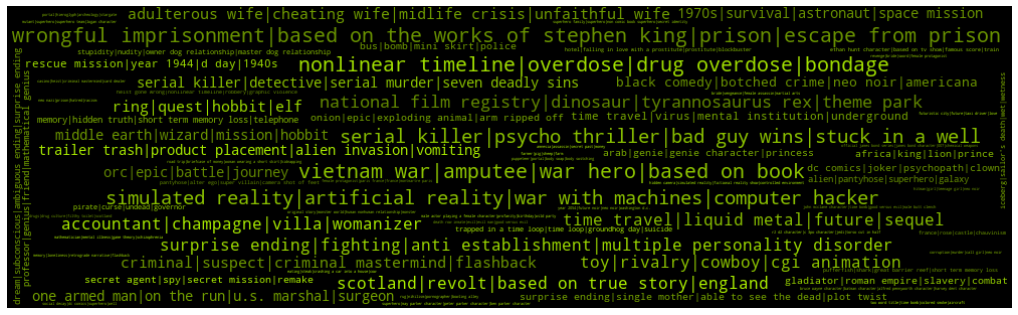

In [169]:
from wordcloud import WordCloud, STOPWORDS
#_____________________________________________
# UPPER PANEL: WORDCLOUD
fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)
#_______________________________________________________
# I define the dictionary used to produce the wordcloud
words = dict()
trunc_occurences = keyword_occurences[0:100]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 55.0 # define the color of the words
#________________________________________________________
wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                      max_words=1628,relative_scaling=1,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')